In [28]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [29]:
def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    return edgeGraph

In [30]:
TwitterPath = 'twitter_combined.txt'
TwitterGraph = dataGraph(TwitterPath)
type (TwitterGraph)
print("converterd graph's file type is: ", type(TwitterGraph))

converterd graph's file type is:  <class 'networkx.classes.graph.Graph'>


In [31]:
print(nx.info(TwitterGraph))

Name: 
Type: Graph
Number of nodes: 81306
Number of edges: 1342310
Average degree:  33.0187


# Menggunakan Pandas untuk membaca Edgelist

In [49]:
pdEdgeList = pd.read_csv(TwitterPath, sep=" ", header=None)
pdEdgeList

,0,1
0,214328887,34428380
1,17116707,28465635
2,380580781,18996905
3,221036078,153460275
4,107830991,17868918
...,...,...
2420761,99841247,154263215
2420762,99841247,194403468
2420763,99841247,180165101
2420764,99841247,253509115


# Membuat Graph

In [33]:
gpd = nx.Graph()

In [34]:
#menambahkan edgelist ke dalam graph
for i, elrow in pdEdgeList.iterrows():
    gpd.add_edge(elrow[0], elrow[1])

In [35]:
#function untuk menghitung degree dari graph
def calculate_degree(G,n = 0):
    fmdegree = []
    fmNode= []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
    
    return fmdegree,fmNode

In [36]:
gpdDegree, gpdNode = calculate_degree(gpd,0)

In [37]:
#maximun & minumum degree dari node
print('Maximum Degree of the node in this network :', max(gpdDegree))
print('Manimum Degree of the node in this network :', min(gpdDegree))

Maximum Degree of the node in this network : 3383
Manimum Degree of the node in this network : 1


# Menconvert Node & Degree ke dalam DataFrame

In [38]:
data = {'Node' : gpdNode,
        'Degree' : gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head()

,Node,Degree
0,214328887,284
1,34428380,2476
2,17116707,257
3,28465635,719
4,380580781,306


# Top 5 Pengguna yang memiliki degree tertinggi

In [39]:
df_NodeDegree.sort_values(by=['Degree'], inplace=True, ascending=False)
df_NodeDegree.head()

,Node,Degree
1758,115485051,3383
63,40981798,3239
1550,813286,3011
90,43003845,2758
880,3359851,2490


# List Koneksi dari Pengguna yang paling berpengaruh (115485051)

In [40]:
gpd[115485051]

AtlasView({29118453: {}, 61391304: {}, 89503894: {}, 34747631: {}, 16801904: {}, 23027237: {}, 15485441: {}, 15666380: {}, 20196258: {}, 21069472: {}, 6480652: {}, 14948898: {}, 391843441: {}, 3359851: {}, 6693562: {}, 114638448: {}, 14957302: {}, 90420314: {}, 75974281: {}, 77645932: {}, 18713254: {}, 15134782: {}, 15481789: {}, 36098990: {}, 50329304: {}, 172768360: {}, 247637481: {}, 18125335: {}, 383493565: {}, 23206141: {}, 14506253: {}, 183008895: {}, 9275742: {}, 80220039: {}, 20108560: {}, 14630319: {}, 78106465: {}, 50374439: {}, 20273398: {}, 144040563: {}, 209806777: {}, 146930781: {}, 6480682: {}, 1715051: {}, 407977463: {}, 23161445: {}, 131170751: {}, 23235056: {}, 16302651: {}, 21362105: {}, 173557788: {}, 22421051: {}, 355044643: {}, 23344817: {}, 553781149: {}, 19693287: {}, 6815302: {}, 899701: {}, 14133970: {}, 178928545: {}, 20654052: {}, 18177126: {}, 22461427: {}, 172933437: {}, 63858347: {}, 50600062: {}, 657863: {}, 38740909: {}, 139162440: {}, 469799060: {}, 97

# Memvisualisasikan Network (full dataset)

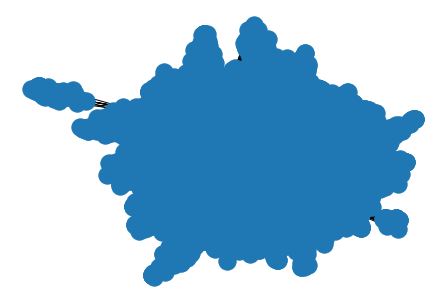

In [15]:
nx.draw(gpd)
plt.show()

# Mencari Nilai Degree dari Pengguna yang Paling Berpengaruh

In [42]:
dc = nx.degree_centrality(gpd)
max_dc = max(list(dc.values()))
print(max_dc)

0.041608757149006824


# Memvisualisasikan Komunitas yang terbentuk (full dataset) dengan Algoritma Louvain

In [16]:
import community as community_louvain

In [17]:
#mencari partisi terbaik
partition = community_louvain.best_partition(gpd)

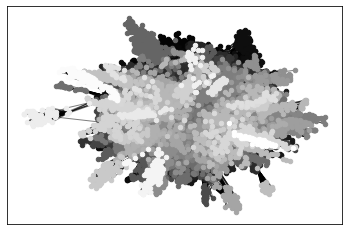

In [16]:
#visualisasi
size = float(len(set(partition.values())))
pos = nx.spring_layout(gpd)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(gpd, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(gpd, pos, alpha=0.5)
plt.show()

# Mencari List Komunitas yang terbentuk dengan sample 1000 data dengan Algoritma Girvan Newman

In [43]:
#Mengambil 1000 data dari dataset
sample_data = pdEdgeList[:1000]
sample_data

,0,1
0,214328887,34428380
1,17116707,28465635
2,380580781,18996905
3,221036078,153460275
4,107830991,17868918
...,...,...
995,314316607,15023872
996,213777144,257236842
997,83943787,22462180
998,2367911,16870853


In [44]:
#membuat graph
gpd_sample = nx.Graph()

In [45]:
#menambahkan sample data ke dalam graph
for i, elrow in sample_data.iterrows():
    gpd_sample.add_edge(elrow[0], elrow[1])

In [46]:
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

In [47]:
#fungsi menentukan nilai betweenness tertinggi pada egde
def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

In [48]:
#list komunitas yang terbentuk
G = nx.path_graph(gpd_sample)
comp = girvan_newman(G, most_valuable_edge=most_central_edge)
tuple(sorted(c) for c in next(comp))

([6581292,
  8088112,
  14925700,
  15023872,
  15150609,
  16870853,
  17116707,
  17434613,
  17675120,
  17759158,
  17868918,
  18996905,
  19493072,
  19705747,
  19933035,
  21146135,
  21548772,
  22462180,
  26929220,
  27633075,
  28465635,
  31331740,
  31414569,
  34428380,
  35148062,
  35359596,
  35415466,
  37699718,
  40981798,
  43003845,
  54228724,
  56860418,
  57490887,
  67864340,
  69592091,
  70492333,
  72818790,
  83943787,
  88097807,
  88323281,
  100581193,
  103598216,
  107511013,
  107830991,
  113058991,
  117674417,
  117901353,
  123371682,
  124528830,
  125120339,
  131613362,
  148519842,
  149538028,
  151338729,
  153226312,
  153460275,
  155661154,
  157829215,
  158419434,
  160237722,
  166214735,
  172883064,
  187773078,
  196327549,
  200559228,
  204317520,
  206923844,
  207594668,
  214328887,
  220068522,
  220368467,
  221036078,
  222261763,
  225444667,
  231238695,
  248883350,
  254839786,
  258140947,
  259842341,
  262802533,
  